# Task 3: Exploratory Data Analysis - Retail

Regarding the attributes included in **SampleSuperstore** dataset

* **'Ship Mode'** is the method of shipping the physical goods and products to the intended customers
* **'Segment**' specifies the customer segment or marketing groups according to their interests and demographics
* **'Country'** is all in the United States of America (USA),
* **'City'** refers to the cities in USA
* **'State'** is made up of the states in USA,
* **'Postal Code'** denotes the postal destination address sorted by the regions in USA
* **'Region'** Country region
* **'Category'** consists of the named groups of similar and defined physical products
* **'Sub-Category'** lists the subdivisions with respect to a given category
* **'Sales'** are the monetary value of transactions between the Superstore and its customers of physical goods in American Dollars (USD$) measurements
* **'Quantity'** records the number of such products in each sales transaction
* **'Discount'** states the percentage of monetary deduction from the usual product price. Units in 100%
* **'Profit'** is the financial gains in USD from each transaction.

## Data Preparation

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#reading the data
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<AxesSubplot:>

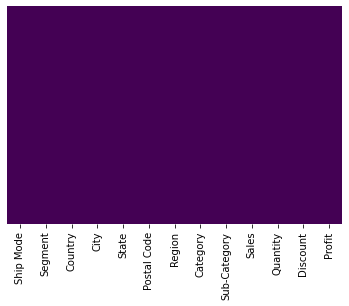

In [5]:
#dealing with missing data in dataset
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
data.shape

(9994, 13)

* There are no null values
* There are 13 attributes and 9994 rows
* We have 8 categorical attributes- 'Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category'
* We have two quantitative discrete integers attributes i.e. Postal Code and Quantity
* 3 quantitative continuous numerical floats with 64 digit placings i.e 'Sales', 'Profit' and 'Discount'

## Data Preprocessing

#### Checking for unique categories in object type attributes (categorical)

In [7]:
categorical_features=[i for i in data.columns if data.dtypes[i]=='object']
def unq_cat(j):
    print('\033[1m' + j + '\033[0m')
    print(sorted(data[j].unique()))
    print('No. Of. unique values',len(data[j].unique()))
categorical_features

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [8]:
unq_cat('Ship Mode')

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
No. Of. unique values 4


In [9]:
unq_cat('Segment')

Segment
['Consumer', 'Corporate', 'Home Office']
No. Of. unique values 3


In [10]:
unq_cat('Country')

Country
['United States']
No. Of. unique values 1


In [11]:
unq_cat('City')

City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream', 'Carrollton', 'Cary', 'Cedar Hill', 'Cedar Rapids', 'Champaign', 'Chandler', 'Chapel Hill', 'Charlotte', 'Charlottesville', 'Chattanooga', 'Chesa

In [12]:
unq_cat('State')

State
['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
No. Of. unique values 49


In [13]:
unq_cat('Region')

Region
['Central', 'East', 'South', 'West']
No. Of. unique values 4


In [14]:
unq_cat('Category')

Category
['Furniture', 'Office Supplies', 'Technology']
No. Of. unique values 3


In [15]:
unq_cat('Sub-Category')

Sub-Category
['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables']
No. Of. unique values 17


In [16]:
#count of unique values
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


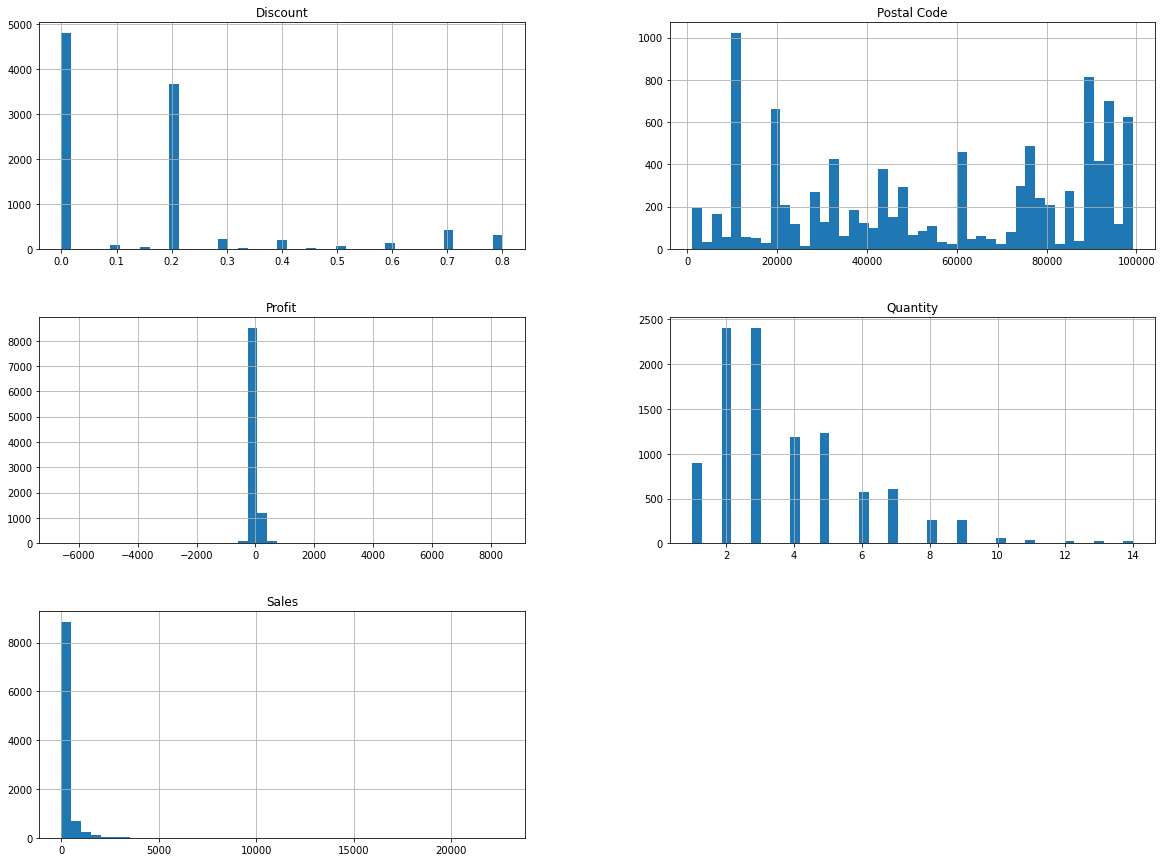

In [17]:
# try to detect the outliers in the dataset by looking in to 
#the histograms of the numerical attributes
data.hist(bins=45,figsize=(20,15))
plt.show()

In [18]:
#Now we are going to handle the duplicate entries in our data set.
data[data.duplicated(subset=None,keep=False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [19]:
data.shape

(9994, 13)

In [20]:
#drop dulplicated records to retain only one copy for each
data=pd.DataFrame.drop_duplicates(data)
data.shape

(9977, 13)

### Data Reduction

Data reduction involves dropping the attribute ‘Country’ through attribute dimensionality reduction, since it is containing 100% exact same values of "United States" for all records. 'Postal Code' is also dropped since this attribute is useless when we're interested in profit.

In [40]:
data=data.drop(['Country','Postal Code'],axis=1)

#### Correlation

A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values. Another reason is to prevent overfitting.

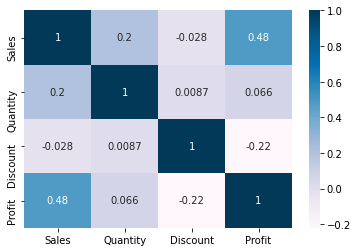

In [43]:
sns.heatmap(data.corr(), cmap = 'PuBu', annot = True)
plt.show()

In this case, the only predictors i will consider to drop will be if their intercorrelations are above 0.95 and almost perfect descriptions of each other. It would be a cause of "redundancy" to include both of them. Therefore, no attributes were removed. no multicollinearity was found.

## Exploratary Data Analysis

In [45]:
#### summary statistics
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [54]:
print('Total Sales:        $',data['Sales'].sum())
print('Total Profit:       $',data['Profit'].sum())
print('Total Quantity sold: ',data['Quantity'].sum())

Total Sales:        $ 2296195.5903
Total Profit:       $ 286241.4226
Total Quantity sold:  37820


* The total sales is USD 2296195.59 , USD230.148902 average for every transaction. It's minimum value is USD 0.4444000 and maximum is USD 22638.48. 

* The total Quantity sold was 37820 of products, with an average of 4 being sold throughout the individual transactions.The range of product sold starts from 1 to 14 

* Average discount was 16% for each transaction. This can range from no discount to a highest discount of 80% for an individual transaction.

* The Superstore made a total profit of USD 28,6241.42, and USD 28.69 on average for each transaction. However, this can range from a loss of USD 6,599.98 to a profit of USD8,399.98 for an individual transaction.

#### Profit and Sales Comparison

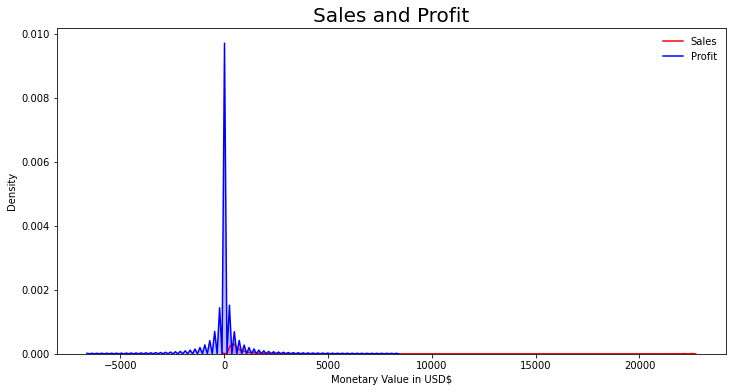

In [68]:
plt.figure(figsize=(12,6))

sns.kdeplot(data['Sales'],label='Sales',color='red',shade=True)
sns.kdeplot(data['Profit'],label='Profit',color='blue',shade=True)
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

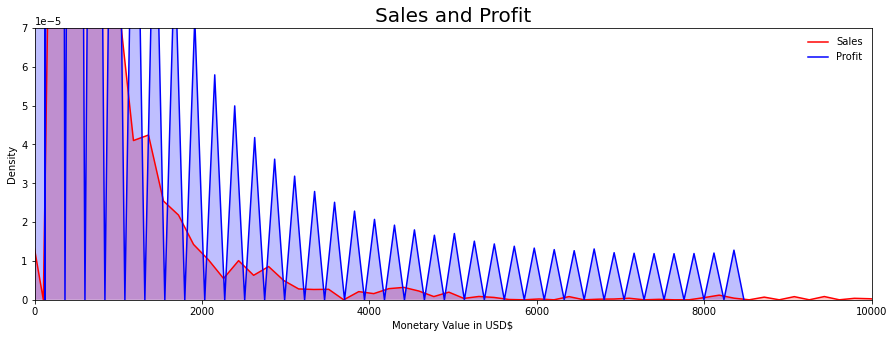

In [157]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons

sns.kdeplot(data['Sales'], color = 'red', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(data['Profit'], color = 'blue', label = 'Profit', shade = True, bw = 25)
plt.xlim([0, 10000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

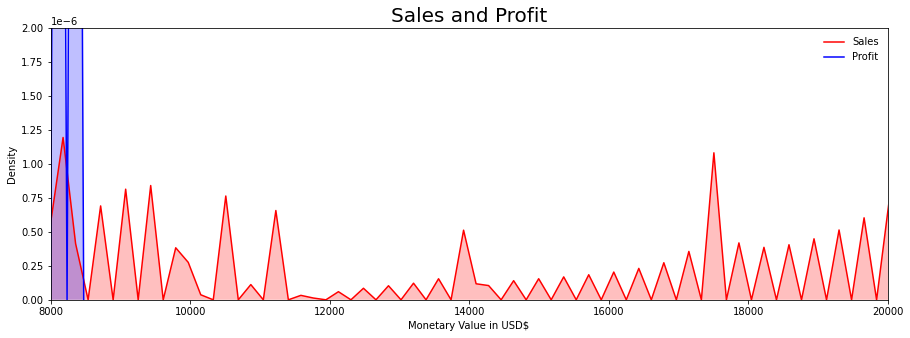

In [77]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(data['Sales'], color = 'red', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(data['Profit'], color = 'blue', label = 'Profit', shade = True, bw = 25)
plt.xlim([8000,20000])
plt.ylim([0, 0.000002])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

* In above plots, the profit values are mostly above than the sales. Which shows good business of the superstore. 
* But sales above USD 8500 are having decreased profits and they are the areas where the improvement is needed.

In [78]:
corr=data.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

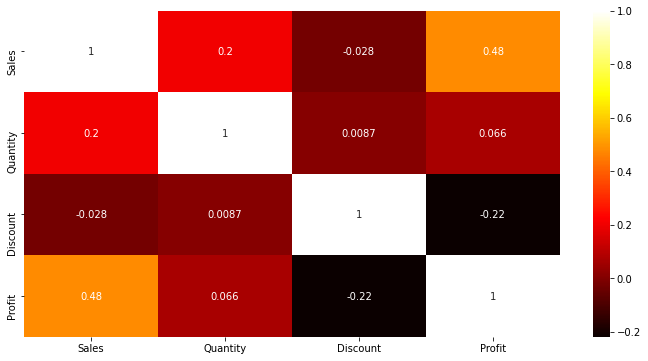

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='hot')

* Sales and Profit have a moderate positive linear correlation indicating good business.
* Discount and Profit have a weak negative linear correlation which means the discounts that were given to increase the profits were causing a negative impact on the profit( it might be bacause of the bad quality products etc or maybe the consumers find it suspicious that the discounts are given ).
* Sales and Discount has very weak or no linear correlation, with increasing discounts the customers were not likely to buy the product hence resulting in a negative correlation.
* Sales and Quantity has weak positive correlation
*  Quantity and Profit have little to no linear correlation i.e when increasing quantity it has little to no effect on the profit maybe because superstore might have promotional strageties of buy one get one etc.


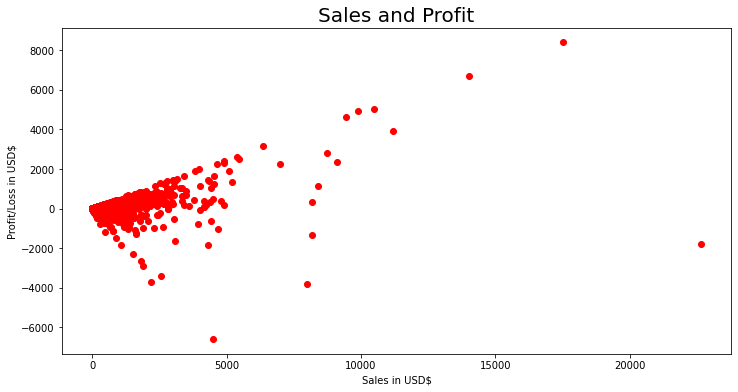

In [88]:
fig,ax=plt.subplots(figsize=(12,6))
ax.scatter(data["Sales"] , data["Profit"], color = 'red')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

* Most of the sales were made under USD 5,000.
* Sales under USD 2,500 were in loss maybe because of the discounted products which decreased the overall revenue.
* Sales above USD 5,000 were hugely profitable.

### Categorical Attributes

#### 1. Category wise analysis

<AxesSubplot:xlabel='Category', ylabel='count'>

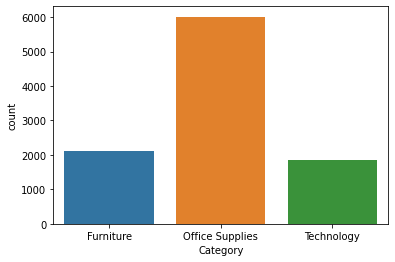

In [84]:
sns.countplot(data['Category'])

In [21]:
#checking in the Category feild.
data.groupby(["Category"]).mean()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,55715.989141,350.002981,3.786591,0.174027,8.697740
Office Supplies,54835.472056,119.550107,3.802562,0.157385,20.353403
Technology,55551.572279,452.709276,3.756903,0.132323,78.752002


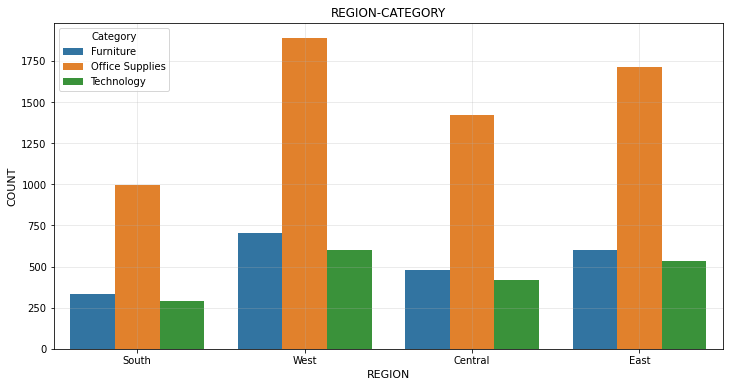

In [31]:
#Plotting based on region and category data
plt.figure(figsize=(12,6))
sns.countplot('Region',hue='Category',data=data)
plt.title('REGION-CATEGORY')
plt.ylabel('COUNT',fontsize=11)
plt.xlabel('REGION',fontsize=11)
plt.grid(alpha=0.3)
plt.show()

### Ship mode based Analysis

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

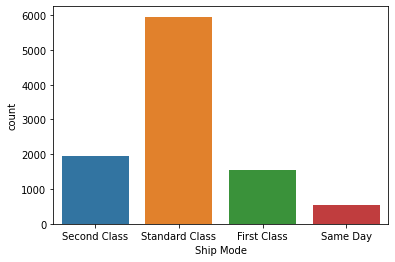

In [164]:
#Now the Analysis on the basis of shiping mode
sns.countplot(x=data['Ship Mode'])

<ipython-input-159-f7997f420b48>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Ship Mode')['Profit','Sales'].sum().plot.bar()


<Figure size 432x216 with 0 Axes>

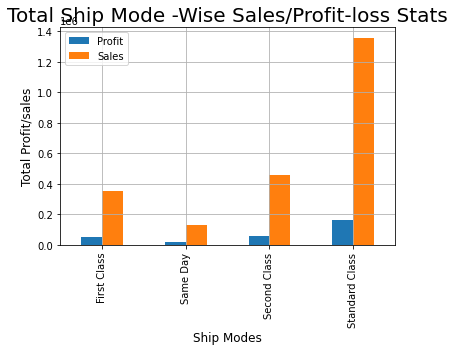

<Figure size 432x216 with 0 Axes>

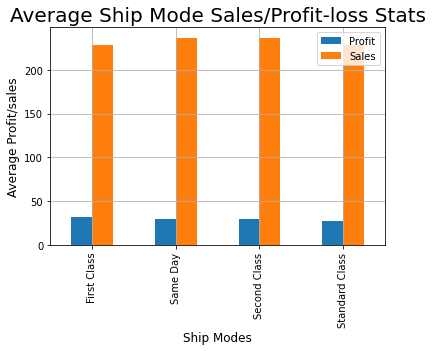

In [159]:
# for the region wise 
fig=plt.figure(figsize=(6,3))

data.groupby('Ship Mode')['Profit','Sales'].sum().plot.bar()
plt.ylabel('Total Profit/sales', fontsize = 12)
plt.xlabel('Ship Modes', fontsize = 12)
plt.title('Total Ship Mode -Wise Sales/Profit-loss Stats', fontsize = 20)
plt.grid()
plt.show()

#average sales and profit analysis
fig=plt.figure(figsize=(6,3))
data_region=data.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
data_region[['Profit','Sales']].plot.bar()
plt.ylabel('Average Profit/sales', fontsize = 12)
plt.xlabel('Ship Modes', fontsize = 12)
plt.title('Average Ship Mode Sales/Profit-loss Stats', fontsize = 20)
plt.grid()
plt.show()

All ship modes have similar sales and profit. This is indicative that all ship modes has little effect on profits.

### Region wise analysis 

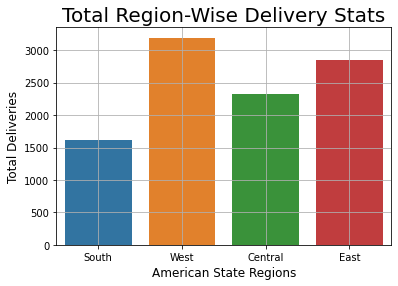

In [130]:
# checking out region wise number of delivery
plt.figure()
sns.countplot(x=data['Region'])
#plt.xticks(rotation=90)
plt.ylabel('Total Deliveries', fontsize = 12)
plt.xlabel('American State Regions', fontsize = 12)
plt.title('Total Region-Wise Delivery Stats', fontsize = 20)
plt.grid()
plt.show()

<ipython-input-143-8c26d6df6a63>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Profit','Sales'].sum().plot.bar()


<Figure size 432x216 with 0 Axes>

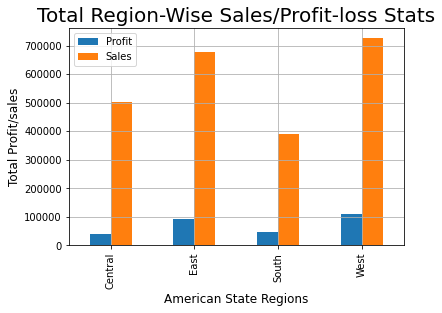

<Figure size 432x216 with 0 Axes>

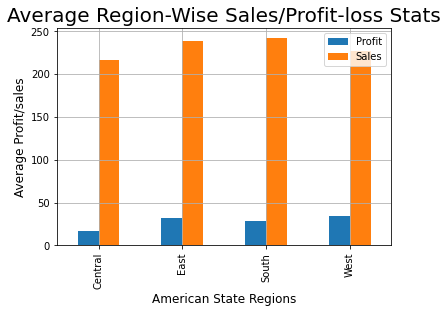

In [143]:
# for the region wise 
fig=plt.figure(figsize=(6,3))

data.groupby('Region')['Profit','Sales'].sum().plot.bar()
plt.ylabel('Total Profit/sales', fontsize = 12)
plt.xlabel('American State Regions', fontsize = 12)
plt.title('Total Region-Wise Sales/Profit-loss Stats', fontsize = 20)
plt.grid()
plt.show()

#average sales and profit analysis
fig=plt.figure(figsize=(6,3))
data_region=data.groupby(['Region'])[['Sales','Discount','Profit']].mean()
data_region[['Profit','Sales']].plot.bar()
plt.ylabel('Average Profit/sales', fontsize = 12)
plt.xlabel('American State Regions', fontsize = 12)
plt.title('Average Region-Wise Sales/Profit-loss Stats', fontsize = 20)
plt.grid()
plt.show()

All regions have similar sales and profit. This is indicative that region has little effect on profits.

###  State wise analysis

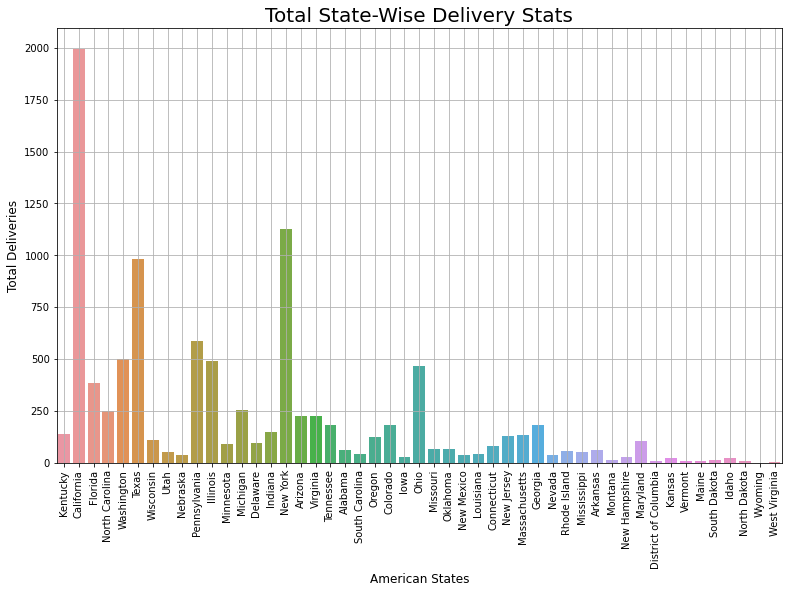

In [199]:
# checking out state wise number of delivery
plt.figure(figsize=(13,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.ylabel('Total Deliveries', fontsize = 12)
plt.xlabel('American States', fontsize = 12)
plt.title('Total State-Wise Delivery Stats', fontsize = 20)
plt.grid()
plt.show()

In [109]:
top_state=data.groupby('State').sum().sort_values('Sales',ascending=False)
top_state['Discount']=top_state['Discount']/data.groupby('State').size()
top_state.head(5)

,Sales,Quantity,Discount,Profit
State,,,,
California,457576.2715,7649,0.072946,76330.7891
New York,310827.1510,4220,0.055368,74015.4622
Texas,170124.5418,3718,0.370539,-25750.9833
Washington,138560.8100,1871,0.064542,33368.2375
Pennsylvania,116496.3620,2150,0.328840,-15565.4035


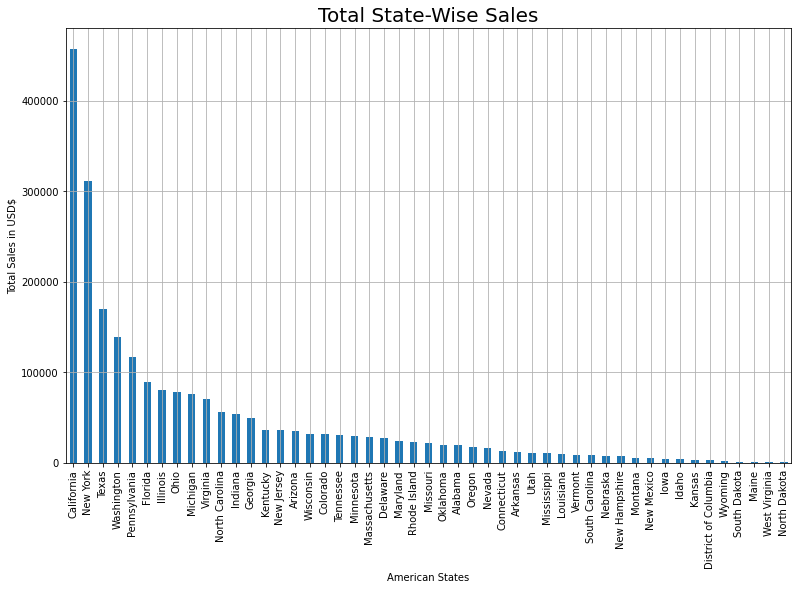

In [96]:
top_sales=data.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize=(13,8))
plt.ylabel('Total Sales in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Sales', fontsize = 20)
plt.grid()
plt.show()

In [110]:
top_state=data.groupby('State').sum().sort_values('Profit',ascending=False)
top_state['Discount']=top_state['Discount']/data.groupby('State').size()
top_state.head(5)

,Sales,Quantity,Discount,Profit
State,,,,
California,457576.2715,7649,0.072946,76330.7891
New York,310827.1510,4220,0.055368,74015.4622
Washington,138560.8100,1871,0.064542,33368.2375
Michigan,75879.6440,943,0.007087,24428.0903
Virginia,70636.7200,893,0.000000,18597.9504


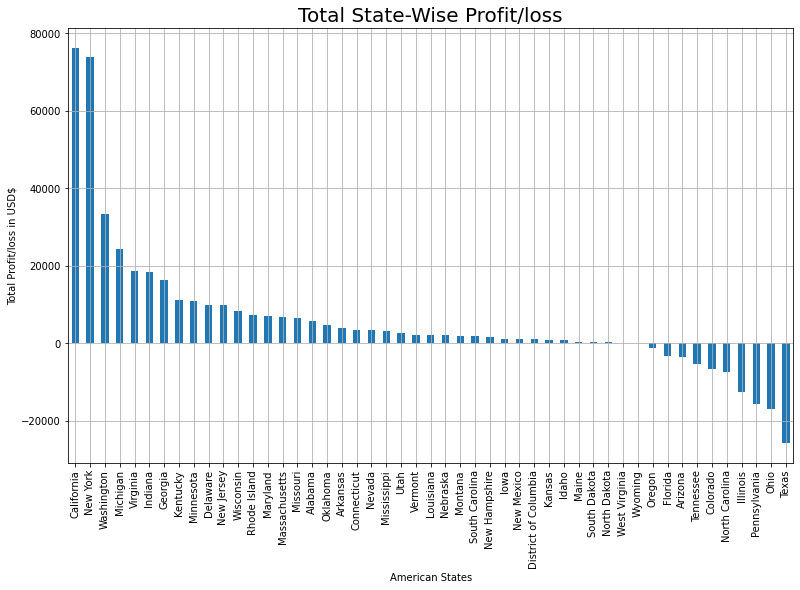

In [98]:
top_sales=data.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize=(13,8))
plt.ylabel('Total Profit/loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/loss', fontsize = 20)
plt.grid()
plt.show()

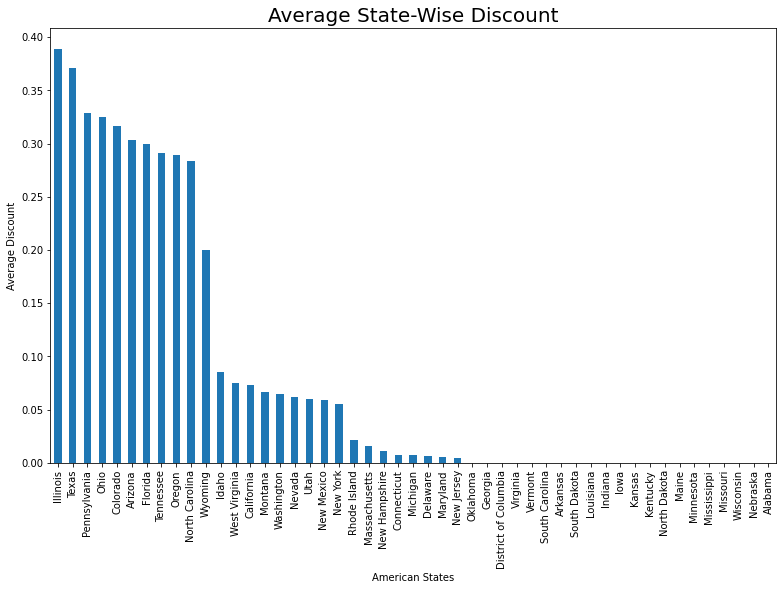

In [112]:
# average Discount for each State
df_state_profit = data.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (13, 8))
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

* Highest Sales are in the states of California, New York and Texas
* California and New York are the top 2 places, with higher profits of around USD 75k. 
* Texas, despite having the third highest sales, suffered the highest loss of around USD25k. This may be because it has the second highest discount level. Superstore is advised to reduce discount levels in Texas, and instead switch to other promotional strategies, in order to minimise losses.
* Pennsylvania, Illinois, and Ohio are the third, first, and fourth state offering larger discounts respectively, and this may be the reason behind them resulting in the third, fourth, and second biggest loss of around USD15k. Superstore is advised to switch to giving less discounts.
* California and New York gives out considerably lower discounts, which may be one of the reasons behind it being top in sales and profit. This is indicative that the promotional strategy of offering less discounts is highly effective in the state of California and New York.
* More than half the states make little to no profit, and a significant number of these even suffer from loss.
* A majority of states offer discounts under 10%.

### Sub-categories wise analysis

In [125]:
#Checking in the sub category field
sub_cat=data.groupby('Sub-Category').sum().sort_values('Profit',ascending=False)
sub_cat['Discount']=sub_cat['Discount']/data.groupby('Sub-Category').size()
sub_cat

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Copiers,149528.0300,234,0.161765,55617.8249
Phones,330007.0540,3289,0.154556,44515.7306
Accessories,167380.3180,2976,0.078452,41936.6357
Paper,78224.1420,5144,0.074908,33944.2395
Binders,203409.1690,5971,0.372011,30228.0003
Chairs,327777.7610,2351,0.170244,26567.1278
Storage,223843.6080,3158,0.074704,21278.8264
Appliances,107532.1610,1729,0.166524,18138.0054
Furnishings,91683.0240,3560,0.138494,13052.7230


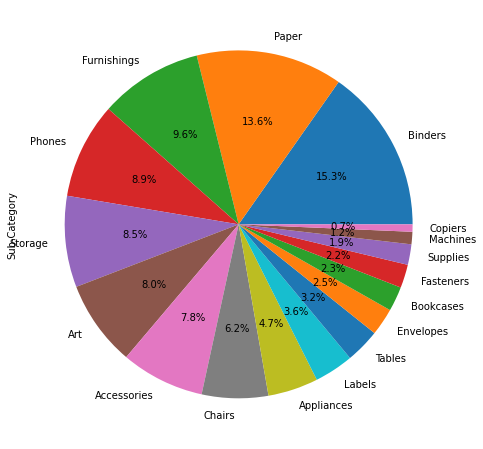

In [118]:
plt.figure(figsize=(16,8))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<ipython-input-174-b328caaadb42>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].mean().sort_values('Profit',ascending=False).plot.bar(figsize=(13,8))


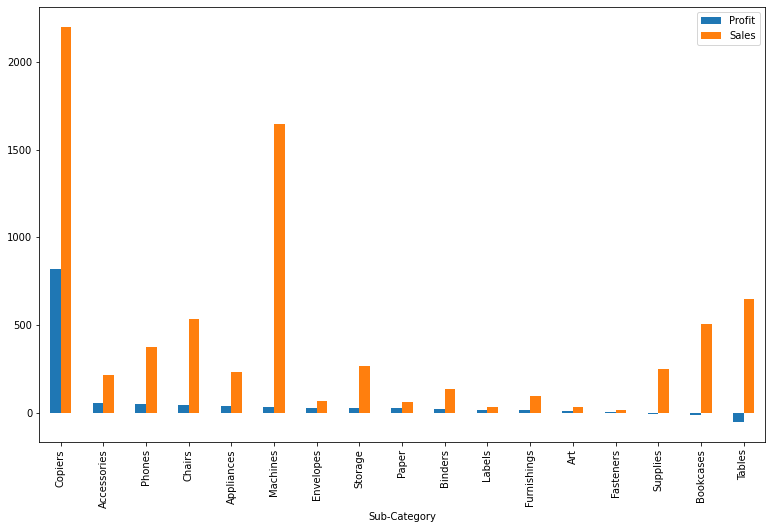

In [174]:
# for the sub category
data.groupby('Sub-Category')['Profit','Sales'].mean().sort_values('Profit',ascending=False).plot.bar(figsize=(13,8))
plt.show()

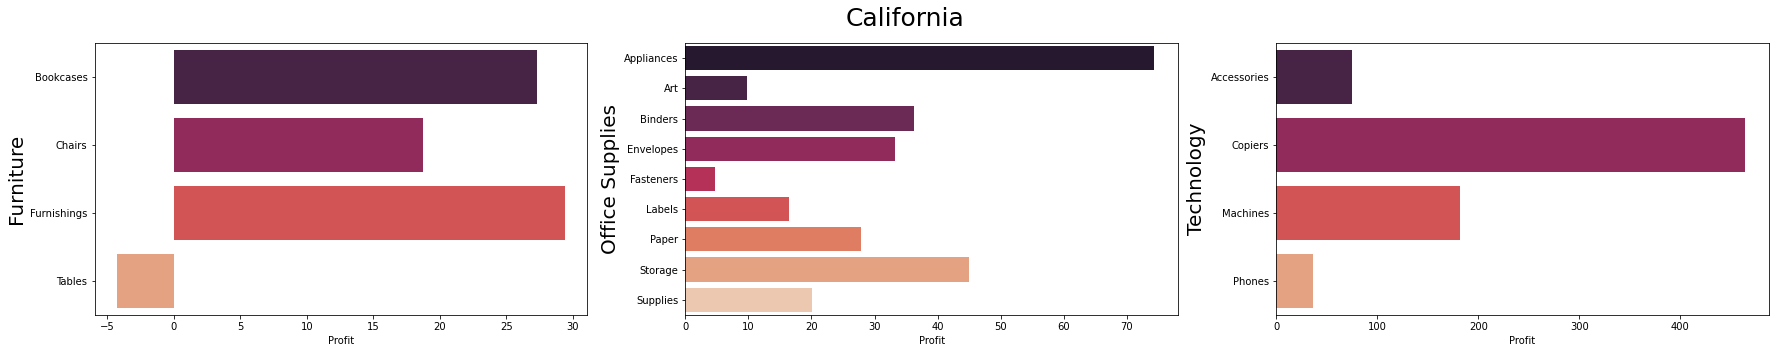

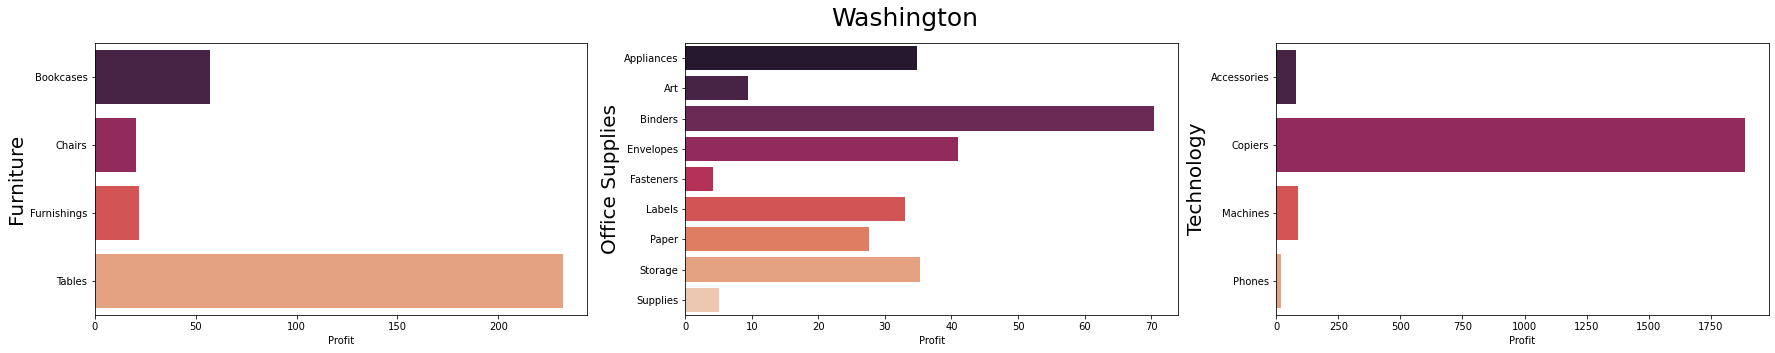

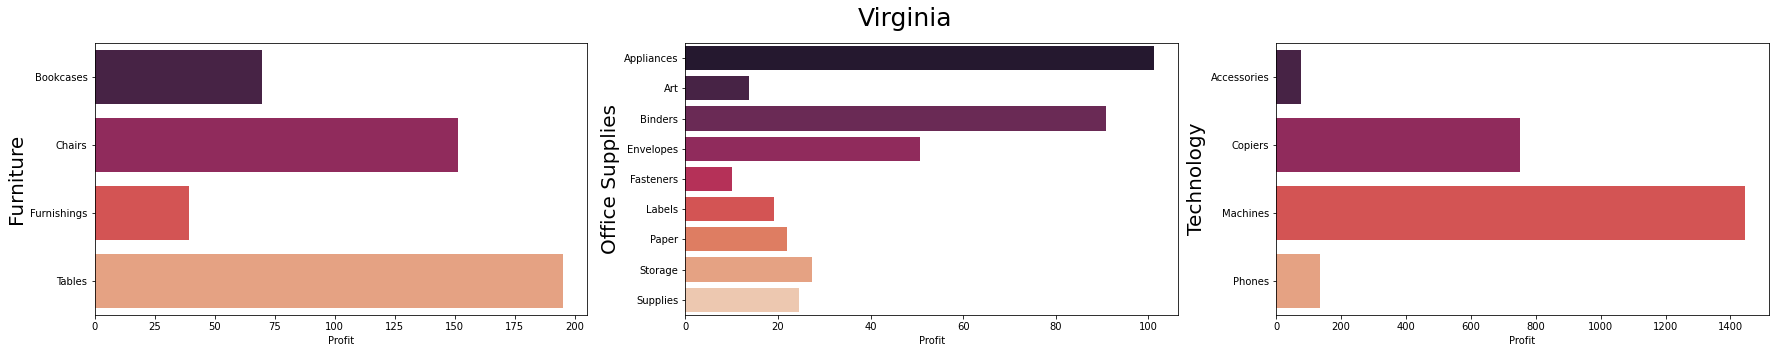

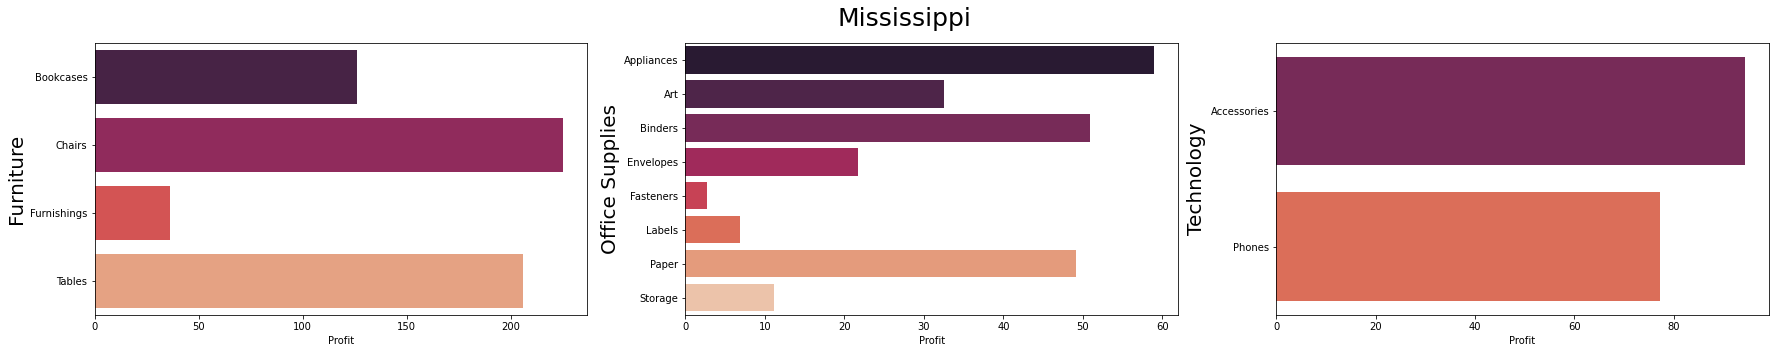

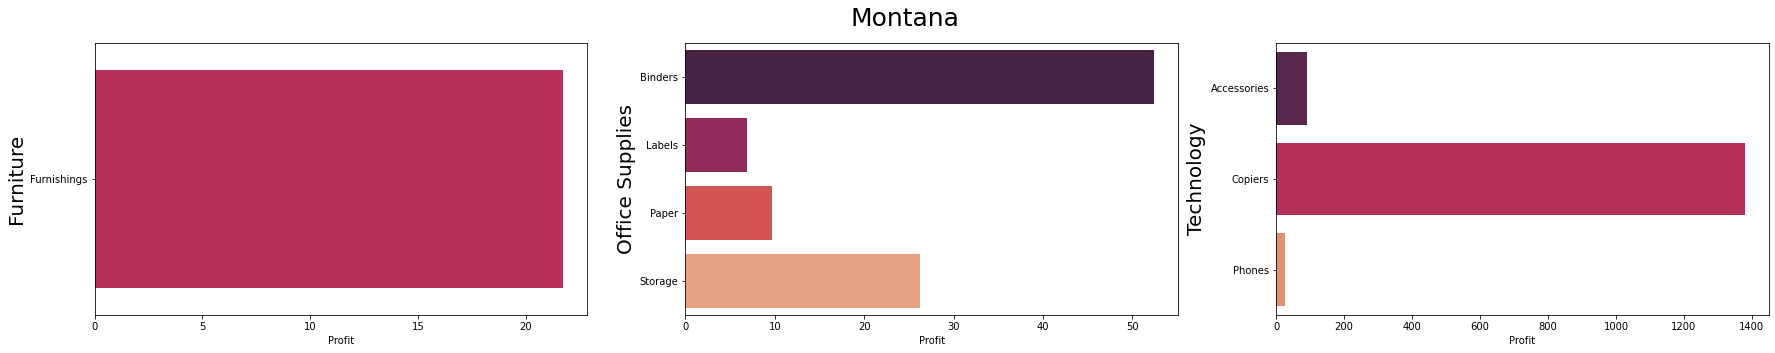

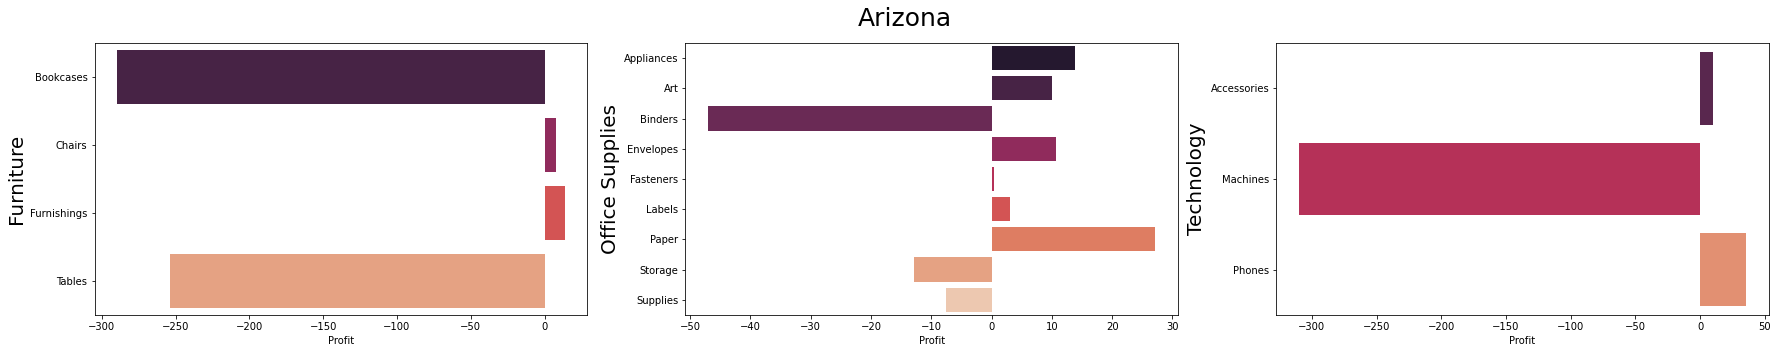

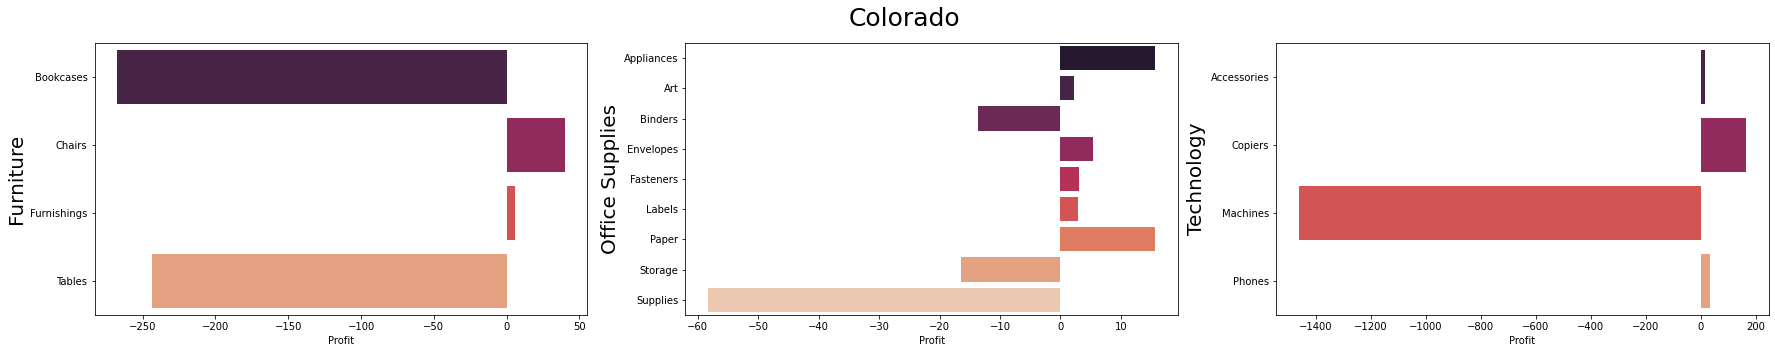

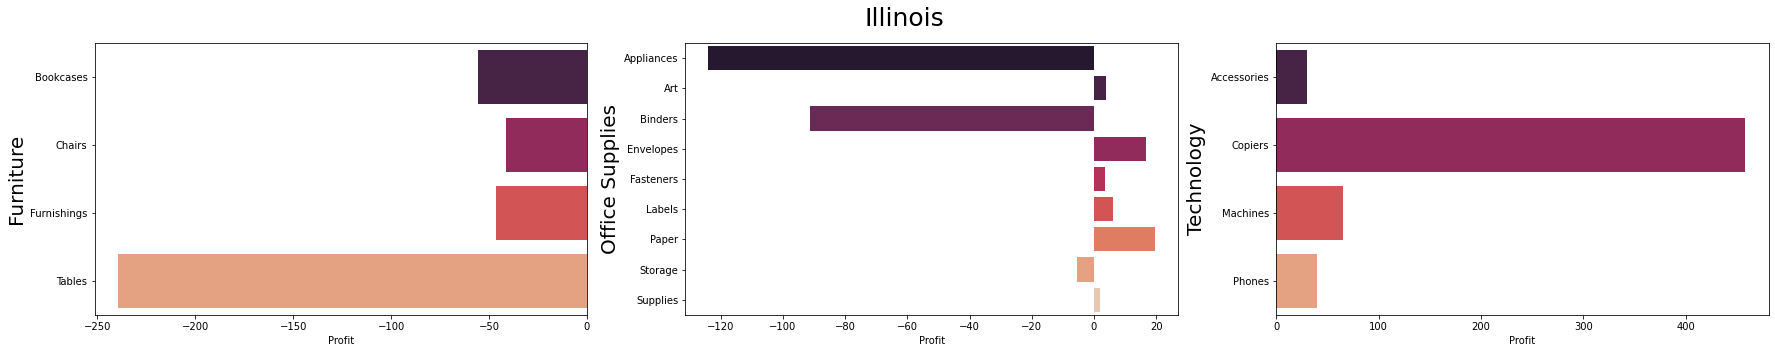

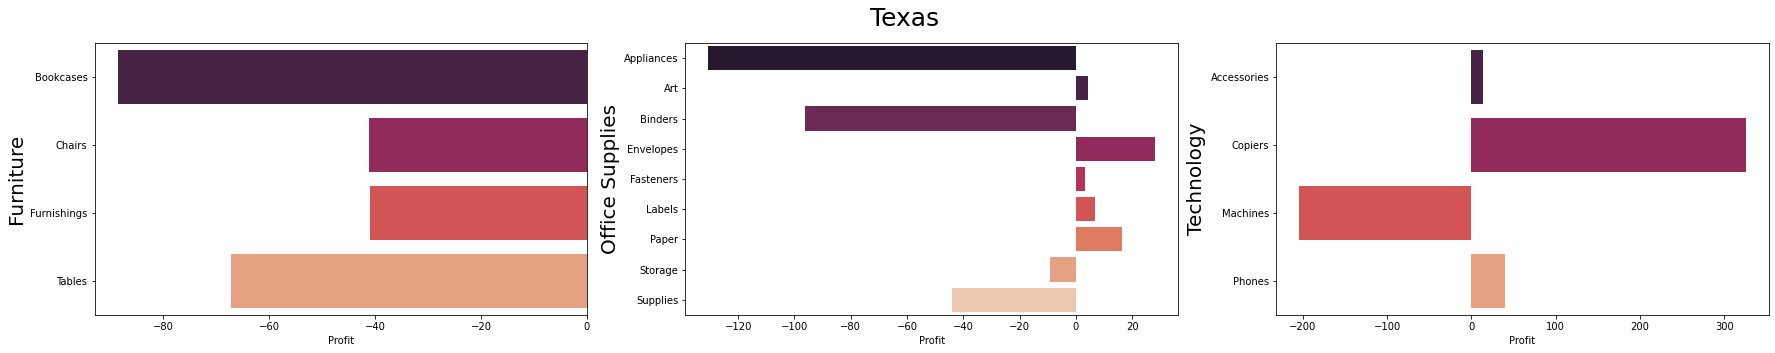

In [202]:
def state_data_viewer(states):
    df=data.groupby(['State'])
    for state in states:
        s_data = df.get_group(state).groupby(['Category'])
        fig,ax=plt.subplots(1,3,figsize=(30,5))
        fig.suptitle(state, fontsize=25)
        ax_index=0
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            category_data=s_data.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x=category_data.Profit,y=category_data.index,ax=ax[ax_index],palette = 'rocket')
            ax[ax_index].set_ylabel(category,fontsize=20)
            ax_index+=1
            
states = ['California', 'Washington','Virginia', 'Mississippi', 'Montana','Arizona','Colorado', 'Illinois', 'Texas']
state_data_viewer(states)       
        

The overall observed negative trend is that all Furniture sub-categories as well as Appliances and Binders under the Office Supplies category contribute to a majority of losses. Superstore is advised to improve on the promotional strategies for these, as well as reduce overall discounts.

The overall observed positive trend is that the sub-categories of Copiers, Accessories, Phones, Envelopes, and Paper are quite definitely profitable.

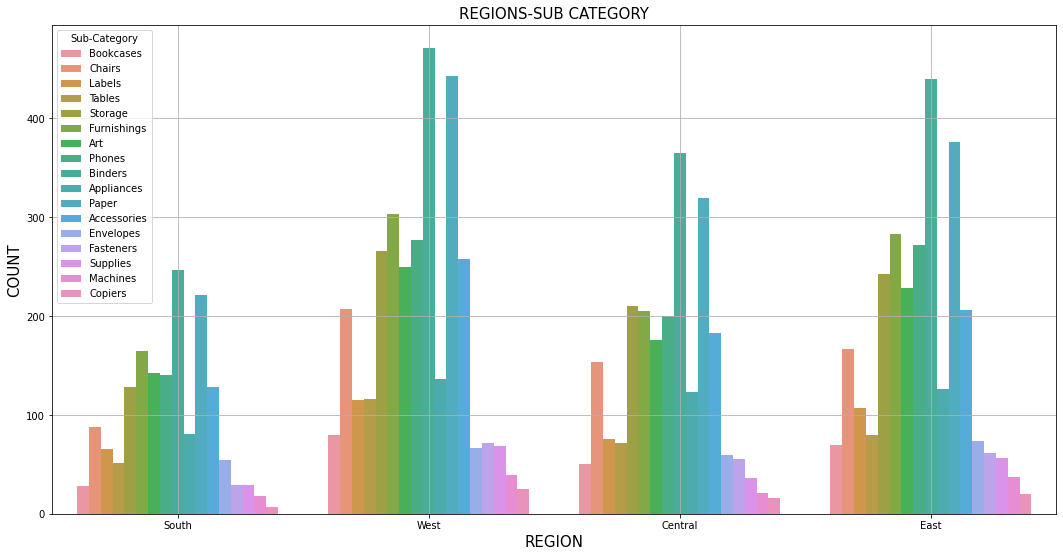

In [120]:
#Ploting based upon the REGION and the Sub-category based.
plt.figure(figsize=(18,9))
sns.countplot('Region',hue='Sub-Category',data=data)
plt.title('REGIONS-SUB CATEGORY',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('REGION',fontsize=15)
plt.grid(alpha=1.0)
plt.show()

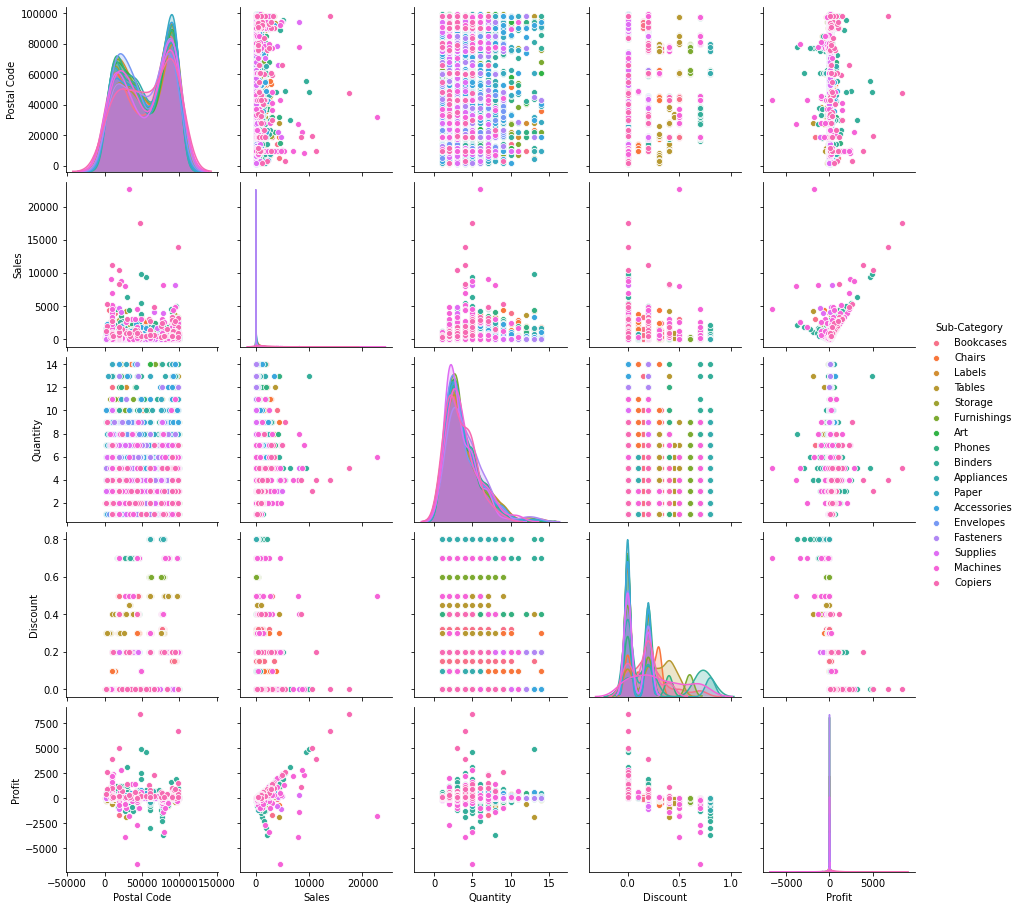

In [38]:
#Pairplot
figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')

## The effect of discount : Final Conclusion

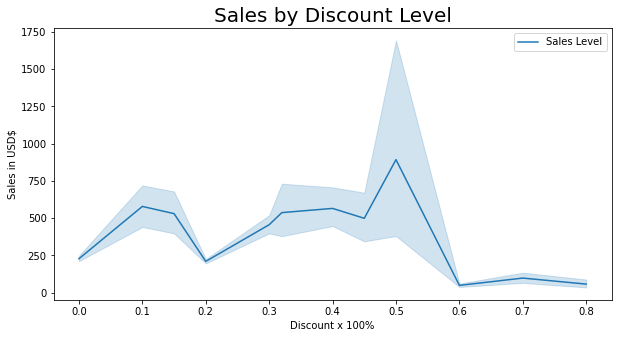

In [152]:
plt.figure(figsize = (10, 5))
# Sales by Discount level
sns.lineplot('Discount', 'Sales', data = data, label = 'Sales Level')
plt.xlabel('Discount x 100%')
plt.ylabel('Sales in USD$')
plt.title('Sales by Discount Level', fontsize = 20)
plt.show()

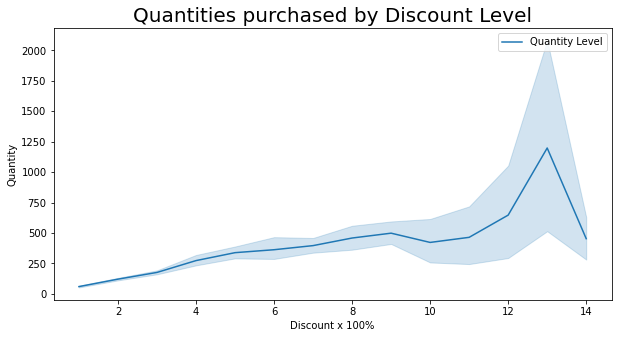

In [151]:
plt.figure(figsize = (10, 5))
# Quantity purchased by Discount level
sns.lineplot('Quantity', 'Sales', data = data, label = 'Quantity Level')
plt.xlabel('Discount x 100%')
plt.ylabel('Quantity')
plt.title('Quantities purchased by Discount Level', fontsize = 20)
plt.show()

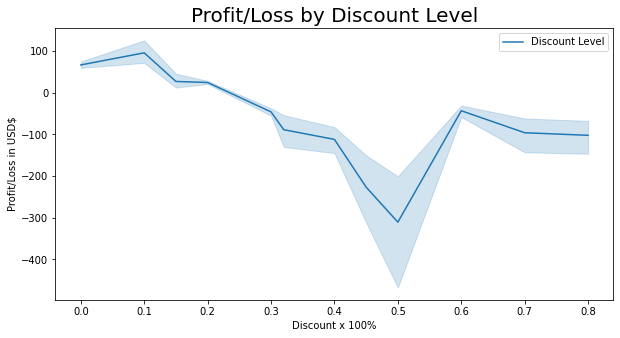

In [147]:
plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot('Discount', 'Profit', data = data, label = 'Discount Level')
plt.xlabel('Discount x 100%')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

* It is seen that as discount increases both sales and quantity purchased increased. People tend to spend more when there are discounts. However at higher discounts both sales and quantity purchased decreases, this might due to the bad consumer pyschology.
* between 0% and 20% of discounts, a profit can be made by reducing the occurences of lowered prices after discount deductions.
* High discounts lead to bad consumer pyschology. Therefore instead of discounts we need to concentrate on other promotional strategy to increase profits.A considerable number of customers may develop the thinking that Superstore's products are defective or low quality. In a long run, this can negatively affect Superstore's brand image. All in all, Superstore is advised to consider other promotional strategies.
* Superstore are more profitable when discount levels below 10% are given.This also helps in lower prices after discount deductions and larger profits